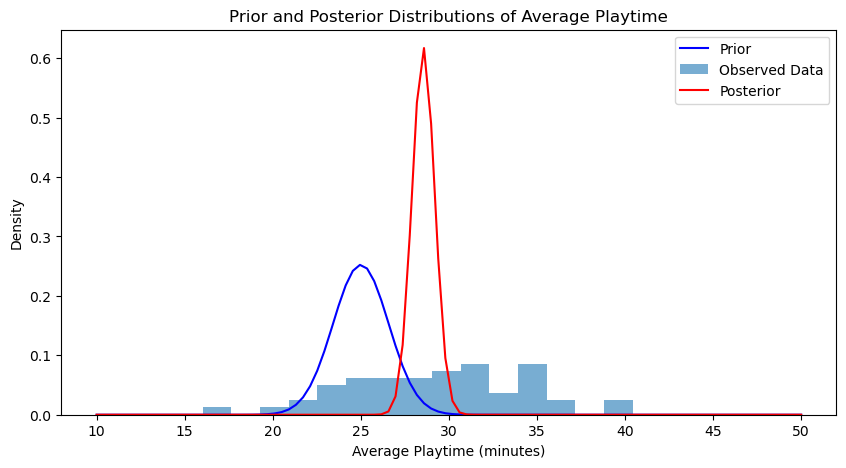

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

true_mu = 30
sigma = 5  # known variance
data_points = np.random.normal(true_mu, sigma, 50)


# Prior hyperparameters (let's assume our prior belief is that average playtime is 25 minutes with a certainty equivalent to 10 data points)
mu0 = 25
sigma0 = np.sqrt(sigma**2 / 10)  # Prior standard deviation
n = len(data_points)

# The posterior parameters are computed as follows:
posterior_sigma2 = 1 / (1/sigma0**2 + n/sigma**2)
posterior_mu = (mu0/sigma0**2 + data_points.sum()/sigma**2) * posterior_sigma2


# Visualize the prior and posterior
x = np.linspace(10, 50, 100)
prior_dist = norm(mu0, sigma0).pdf(x)
posterior_dist = norm(posterior_mu, np.sqrt(posterior_sigma2)).pdf(x)

plt.figure(figsize=(10, 5))
plt.plot(x, prior_dist, label='Prior', color='blue')
plt.hist(data_points, density=True, bins=15, alpha=0.6, label='Observed Data')
plt.plot(x, posterior_dist, label='Posterior', color='red')
plt.title('Prior and Posterior Distributions of Average Playtime')
plt.xlabel('Average Playtime (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

